# **PandaTanam - Leaf Disease Detection using Deep Learning**


In this notebook, we will utilize TensorFlow and pre-trained models to classify tomato leaf diseases using image datasets. We'll download the dataset, preprocess images, and train a convolutional neural network to achieve accurate classification.

## **Collecting Data**

### 1. Setting Up Kaggle API for Dataset Access

To access the dataset from Kaggle, we'll configure the environment by installing the kaggle library and authenticating using the Kaggle API key.

In [1]:
pip install -q kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!mkdir ~/.kaggle

The syntax of the command is incorrect.


In [3]:
!cp kaggle.json ~/.kaggle/

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!chmod 600 ~/.kaggle/'kaggle.json'

'chmod' is not recognized as an internal or external command,
operable program or batch file.


### 2. Listing and Downloading Datasets from Kaggle

We'll list available datasets and download the one required for our project (tomatoleaf dataset).

In [5]:
! kaggle datasets list

Traceback (most recent call last):
  File "C:\Users\axeld\AppData\Local\Programs\Python\Python310\Scripts\kaggle-script.py", line 33, in <module>
    sys.exit(load_entry_point('kaggle==1.6.17', 'console_scripts', 'kaggle')())
  File "C:\Users\axeld\AppData\Local\Programs\Python\Python310\Scripts\kaggle-script.py", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "c:\Users\axeld\AppData\Local\Programs\Python\Python310\lib\importlib\metadata\__init__.py", line 171, in load
    module = import_module(match.group('module'))
  File "c:\Users\axeld\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 992, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 241, i

In [6]:
!kaggle datasets download -d 'kaustubhb999/tomatoleaf'

403 - Forbidden - Permission 'datasets.get' was denied


### 3. Extracting the Downloaded Dataset

We'll extract the contents of the dataset zip file to access the training and validation images.

In [7]:
import zipfile
import os
import shutil

In [8]:
dataset_zip = zipfile.ZipFile('tomatoleaf.zip','r')
dataset_zip.extractall()
dataset_zip.close()

FileNotFoundError: [Errno 2] No such file or directory: 'tomatoleaf.zip'

### 4. Importing Required Libraries

Importing essential Python libraries for deep learning, data preprocessing, and visualization.

In [ ]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

## **Cleaning and Formatting Data**

### 5. Loading and Preprocessing the Training Dataset

We will load the images from the training directory and apply image preprocessing techniques such as rescaling, random flipping, rotation, zooming, and contrast adjustment.

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/tomato/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

Found 10000 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers

# Preprocessing: Define the preprocessing and augmentation steps
preprocessing_layers = tf.keras.Sequential([
    layers.Rescaling(1./255),                 # Normalize pixel values to [0, 1]
    layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    layers.RandomRotation(0.2),               # Randomly rotate images by 20%
    layers.RandomZoom(0.1),                   # Randomly zoom images by up to 10%
    layers.RandomContrast(0.1)                # Adjust contrast randomly within 10%
])

In [ ]:
# Apply preprocessing to the dataset
train_data = train_data.map(lambda x, y: (preprocessing_layers(x), y))

## **Dataset Preparation: Training, Validation, and Evaluation**

###  6. Loading and Preparing Validation Data

Similar to the training data, we load and preprocess the validation dataset.

In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/tomato/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

Found 1000 files belonging to 10 classes.


In [ ]:
# Apply preprocessing to the dataset
val_data = val_data.map(lambda x, y: (preprocessing_layers(x), y))

### 7. Visualizing Sample Images from the Dataset

We will display some sample images from different disease categories to get an overview of the dataset.

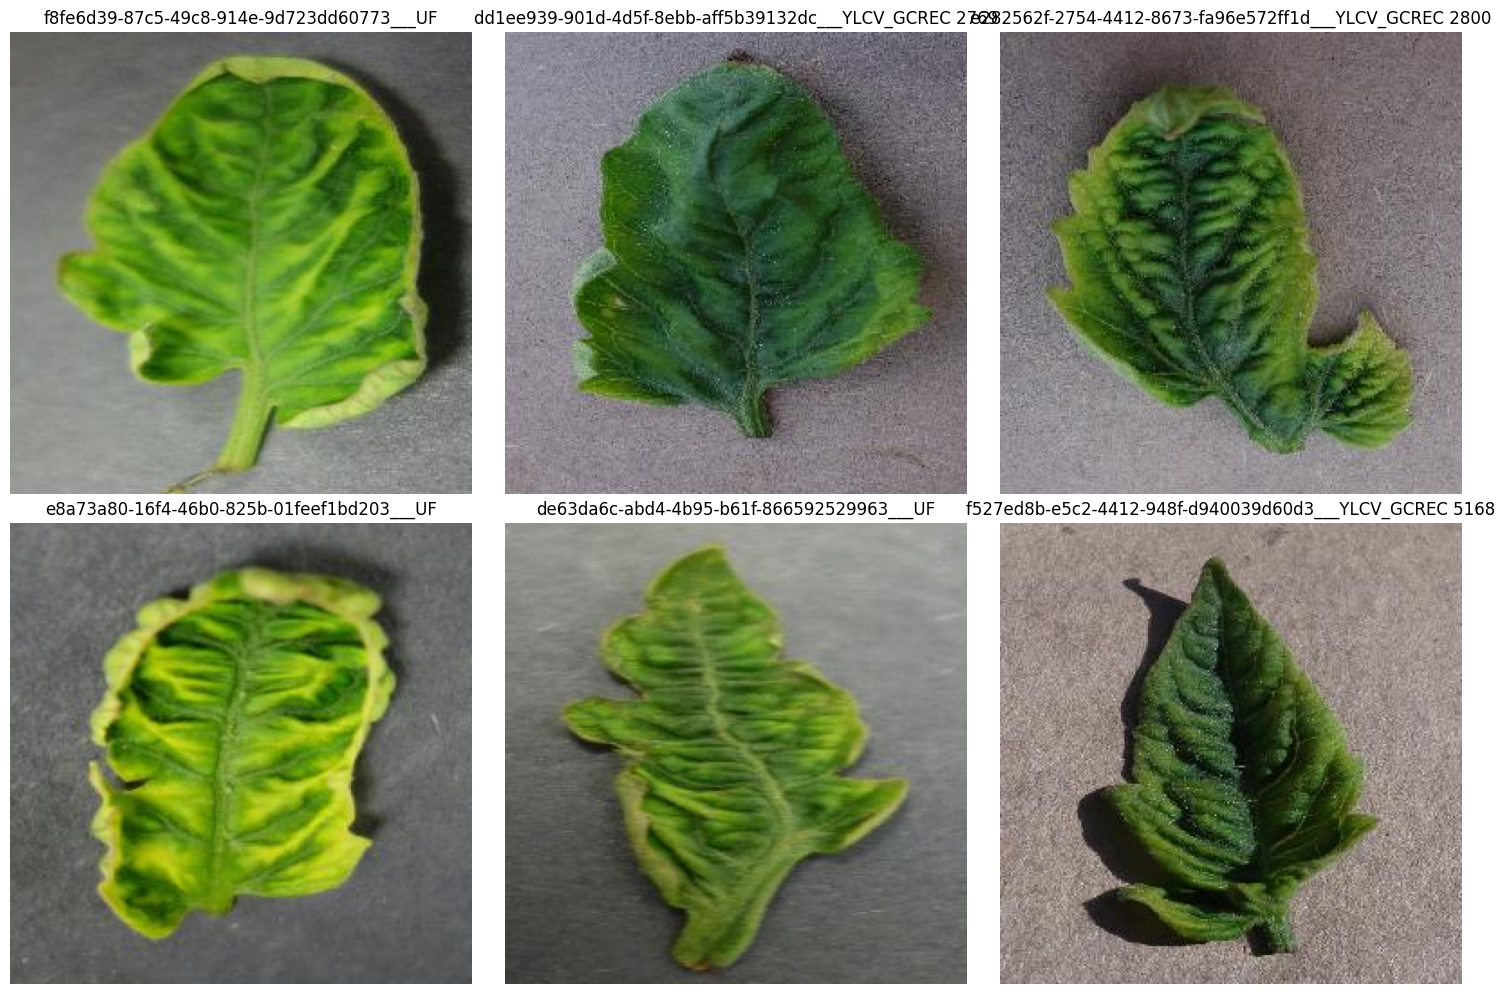

In [ ]:
# Path to the directory containing images
path = "/content/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

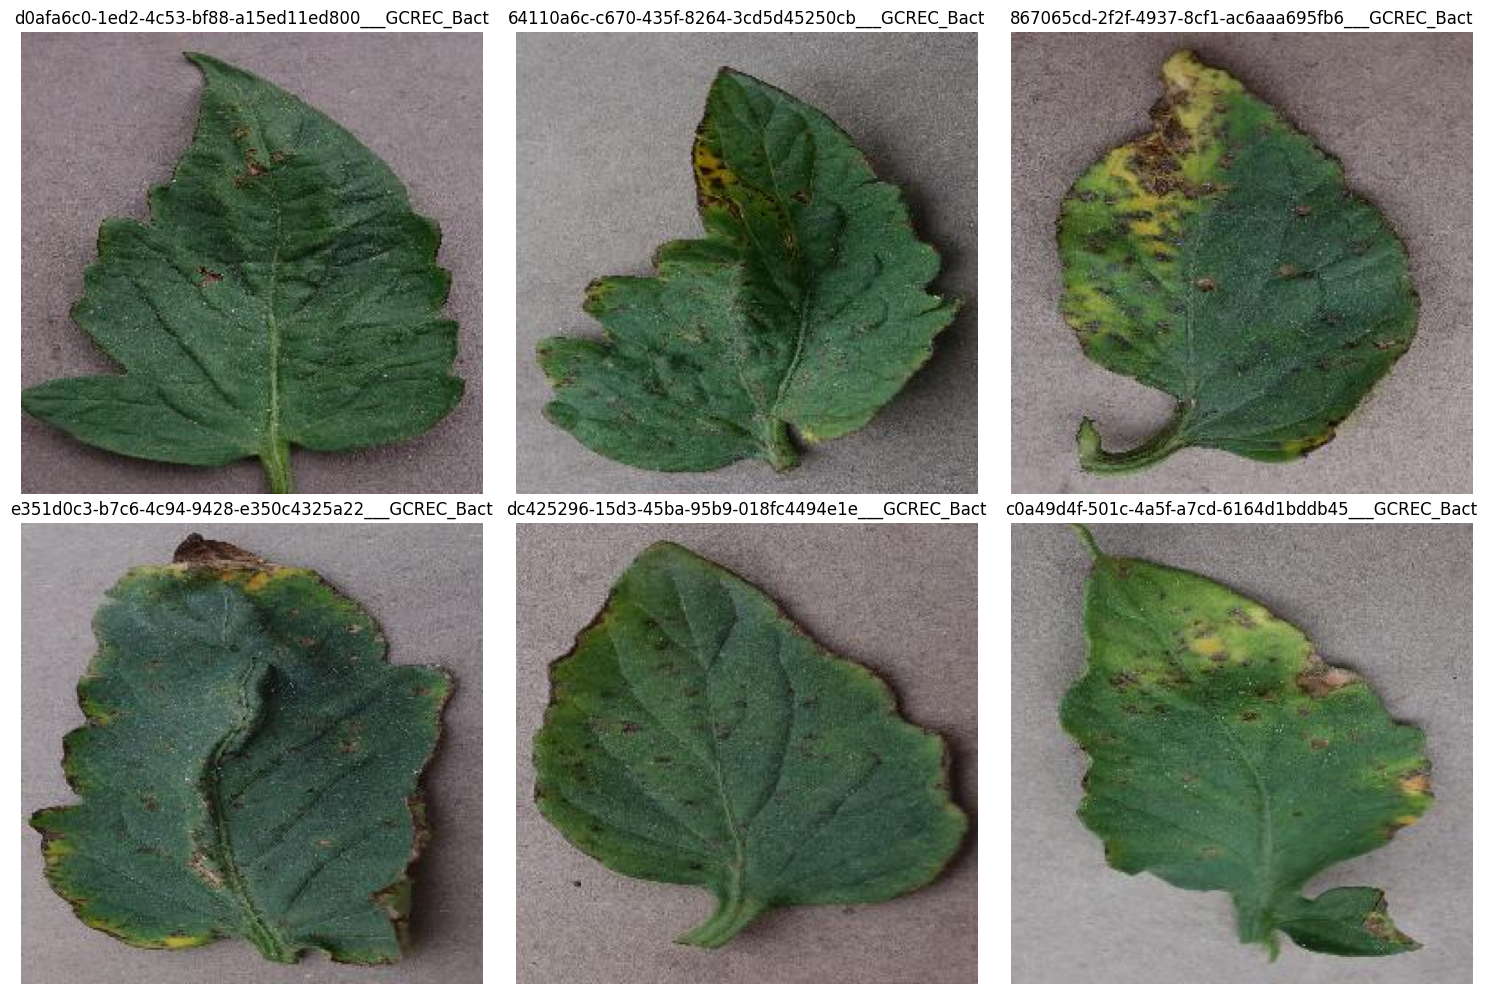

In [ ]:
# Path to the directory containing images
path = "/content/tomato/train/Tomato___Bacterial_spot"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

### 8. Building the Deep Learning Model using Transfer Learning

We'll use `DenseNet121` as a pre-trained model, adding custom layers for tomato disease classification.

In [ ]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.trainable = False

In [ ]:
# # Summary of the pretrained model
# conv_base.summary(

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## **Model Training and Evaluation**

### 9. Training the Model

We will train the model on the preprocessed training data with early stopping to avoid overfitting.

In [ ]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 267s 761ms/step - accuracy: 0.2758 - loss: 2.1716 - val_accuracy: 0.7000 - val_loss: 1.1321
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 209s 668ms/step - accuracy: 0.6548 - loss: 1.0635 - val_accuracy: 0.8010 - val_loss: 0.6624
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 265s 680ms/step - accuracy: 0.7486 - loss: 0.7687 - val_accuracy: 0.8400 - val_loss: 0.5049
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 210s 669ms/step - accuracy: 0.8013 - loss: 0.6003 - val_accuracy: 0.8860 - val_loss: 0.3975
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 213s 680ms/step - accuracy: 0.8280 - loss: 0.5178 - val_accuracy: 0.8840 - val_loss: 0.3681
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 263s 683ms/step - accuracy: 0.8474 - loss: 0.4647 - val_accuracy: 0.9090 - val_loss: 0.3113
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 263s 687ms/step - accuracy: 0.8589 - loss: 0.4223 - val_accuracy: 0.9070 - val_loss: 0.2878
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 209s 668ms/step - accuracy: 

### 10. Evaluating the Model Performance

we will evaluate the model on the validation dataset and print the accuracy and loss.

In [ ]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 619ms/step - accuracy: 0.9278 - loss: 0.2172
Validation Loss: 0.1956176459789276
Validation Accuracy: 0.9319999814033508


In [ ]:
# Interactive widgets
from ipywidgets import widgets
from io import BytesIO
import numpy as np
rescale_layer = tf.keras.layers.Rescaling(1./255)
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(256, 256))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]

    with out:
        if prediction > 0.5:
            print(filename + " is a Bacterial spot")
        else:
            print(filename + " is a Early_blight")


def on_upload_change(change):
    """ A function for getting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    items = change.new
    for filename, file_data in items.items():  # Loop through the uploaded files
        file_jpgdata = BytesIO(file_data['content'])  # Get the content of the file
        file_predict(filename, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

In [ ]:
model.save('plant-disease-detection.h5')